In [1]:
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import benchmark_utils as utils
import warnings
from utils import *
from matplotlib.pyplot import *
from pathlib import Path, PurePath
from nilearn import image, plotting
from nilearn.input_data import NiftiMasker, NiftiLabelsMasker
from nilearn.glm.first_level import FirstLevelModel
from load_confounds import Params9
from sklearn.model_selection import KFold
from nilearn.decoding import Decoder
from IPython.display import Markdown, display

In [2]:
subj = 'sub-01'
path = '/home/SRastegarnia/hcptrt_decoding_Shima/DATA/cneuromod/hcptrt/sub-01/fmriprep-20.1.0/'
task_dir = '/home/SRastegarnia/hcptrt_decoding_Shima/hcptrt_decoding'

task_labels = ['wm', 'motor', 'language', 'gambling', 'social', 'relational', 'emotion']
# warnings.filterwarnings('ignore')

### Results for restriced benchmark using relevant trial types:

**Task: wm**

0-Back_Body 0.9083333333333334
0-Back_Face 0.9
0-Back_Place 0.9166666666666666
0-Back_Tools 0.8916666666666668
2-Back_Body 0.9166666666666666
2-Back_Face 0.9333333333333332
2-Back_Place 0.9083333333333332
2-Back_Tools 0.8666666666666668
mean value: 0.9052083333333334 



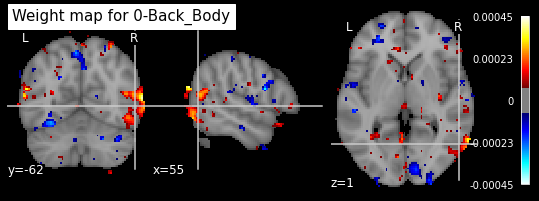

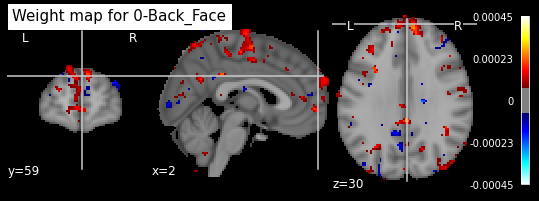

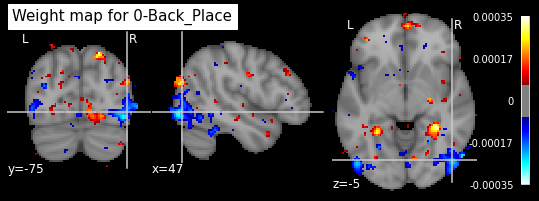

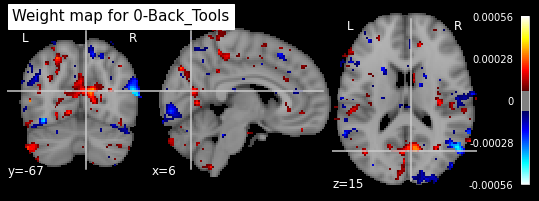

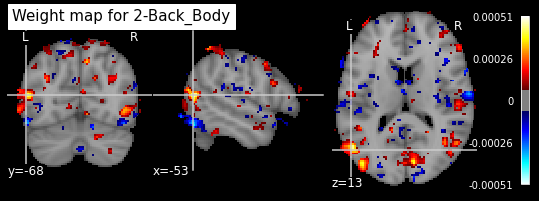

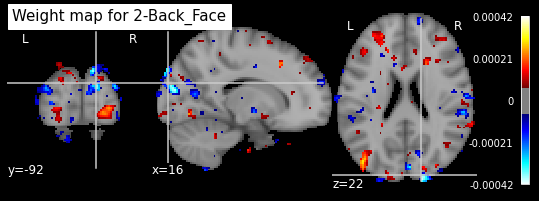

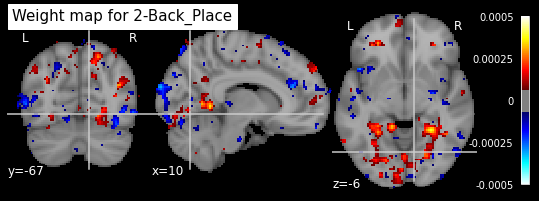

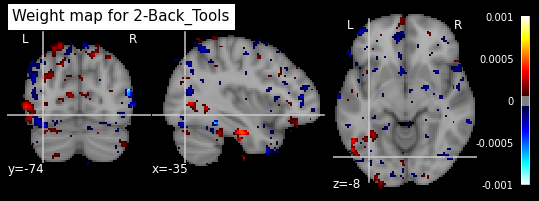

**Task: motor**

response_left_foot 1.0
response_left_hand 0.9733333333333334
response_right_foot 0.9866666666666667
response_right_hand 0.9866666666666667
response_tongue 0.9733333333333334
mean value: 0.984 



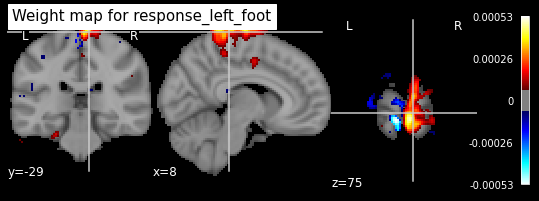

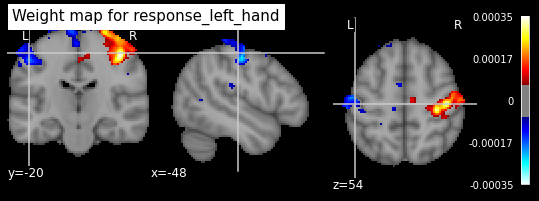

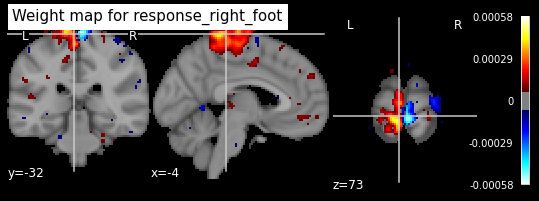

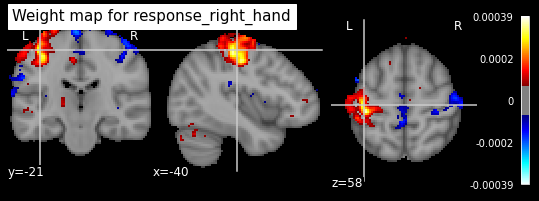

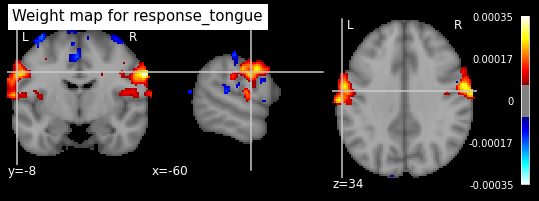

**Task: language**

presentation_math 0.9286764705882353
presentation_story 0.9764705882352942
question_math 0.9036764705882352
question_story 0.9404411764705882
response_math 0.9286764705882353
response_story 0.9036764705882353
mean value: 0.9302696078431372 



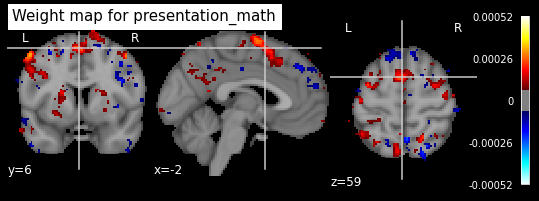

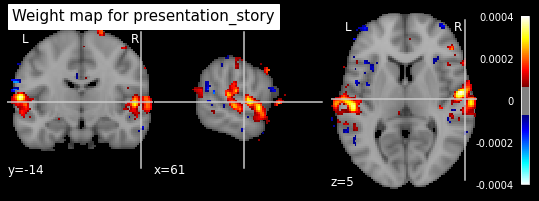

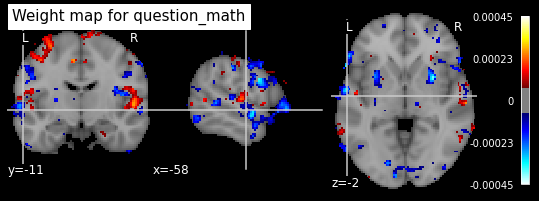

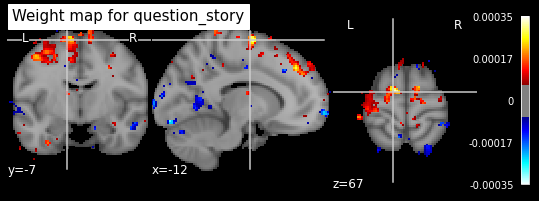

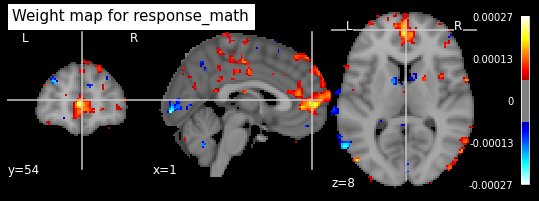

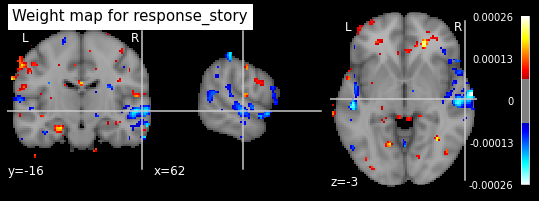

**Task: gambling**

Feedback 0.9666666666666666
Neutral 0.85
Punishment 0.7
Reward 0.6666666666666667
mean value: 0.7958333333333334 



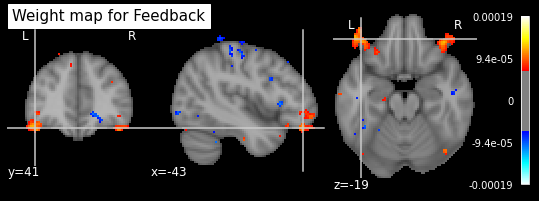

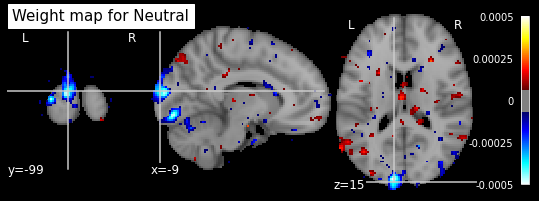

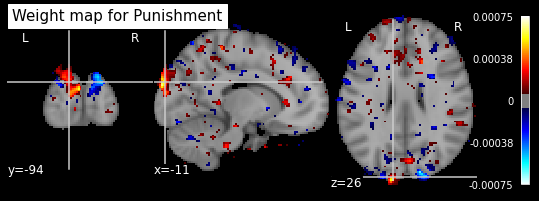

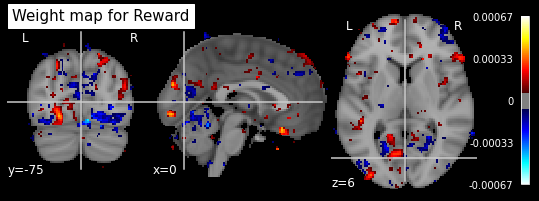

**Task: social**

Mental 0.9333333333333333
Random 0.9333333333333333
mean value: 0.9333333333333333 



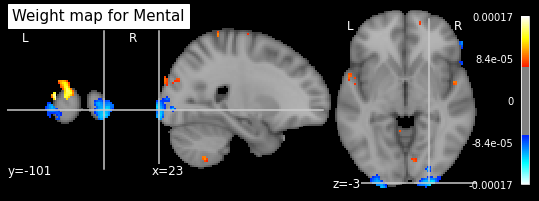

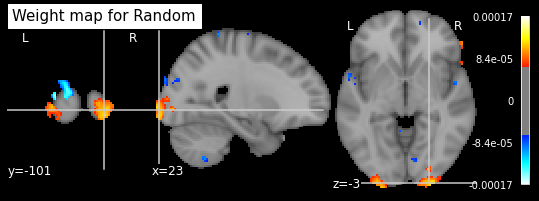

**Task: relational**

Control 0.9266666666666667
Relational 0.9266666666666667
mean value: 0.9266666666666667 



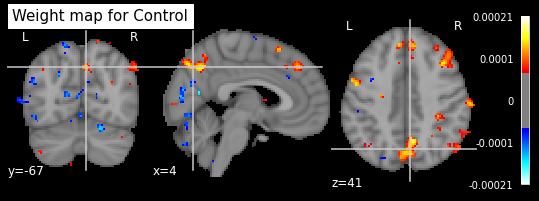

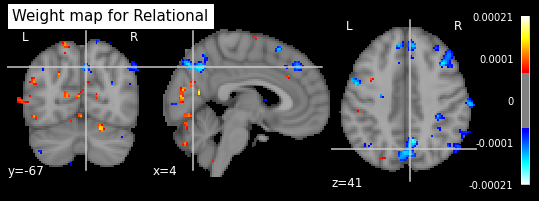

**Task: emotion**

response_face 1.0
response_shape 1.0
mean value: 1.0 



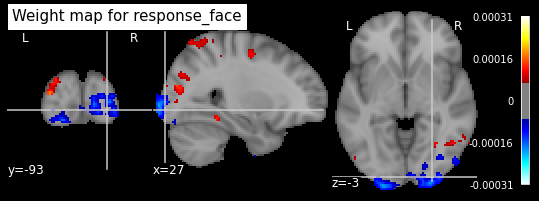

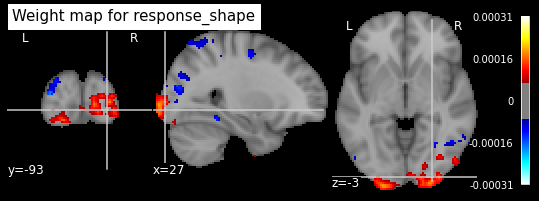

In [3]:
for task_label in task_labels:    
    
    mask_name = path + 'sub-01_ses-002_task-{}_run-2_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'.format(task_label)
    event_file = path + 'sub-01_ses-002_task-{}_run-02_events.tsv'.format(task_label)
    utils.printmd('**Task: {}**'.format(task_label))
    
    # Regress out the out of interest conditions
    df = utils.new_conditions(path, event_file, task_label)
    conds = utils.conditions(event_file=df)

    # Generate beta maps
    utils.postproc_task(subject=subj, task_label=task_label, conditions=conds, tpl_mask=mask_name)
    
    # Decoder
    utils.check_decoding(task_dir, task_label, mask_name)